# __Построение графиков: библиотека Matplotlib__

Для того, чтобы после проведения расчетов не выводить результаты в файл и затем вручную строить графики в сторонних программах типа Excel, Gnuplot, и.т.д., для Python создана собственная библиотека построения графиков Matplotlib, позволяющая проводить визуализацию данных, находящихся в оперативной памяти.
    

Итак, сначала импортируем требуемые модули:

In [1]:
import numpy as np
import matplotlib.pyplot as plt # импортируем модуль для построения графиков
%matplotlib inline

plt.rc('font', size=20) # подобным образом можно установить размер шрифта на графиках

## 1D-графики

Построим график функции, например такой: $f(x) = \sin\left( \exp(x) \right) + 2 \cdot \ln \left(1 + x^2 \right), \, 0 < x < 1$

In [3]:
xLeft, xRight = 1.5, 4.
numPoints = int(5e1)
xData = np.linspace(xLeft, xRight, numPoints)
yData = np.sin(np.exp(xData)) + 2.*np.log(1 + (xData**2))

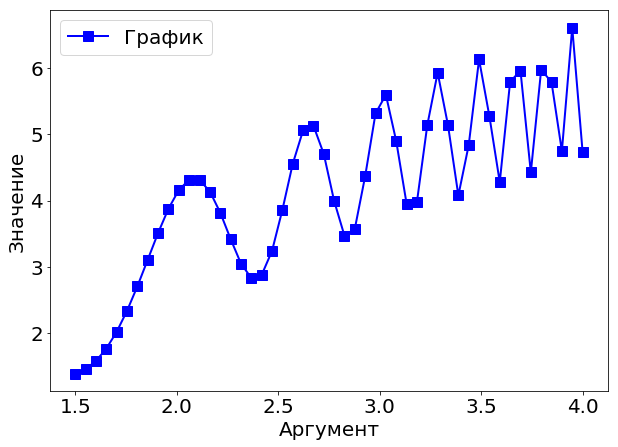

In [4]:
plt.figure(figsize=(10, 7)) # создает пустое графическое окно, с заданными размерами по верт. и горизонт.
plt.plot(xData, yData, 'b-s', label='График', linewidth=2, markersize = 10) # 'b-o'
# для стиля лиии существует богатый набор ticks: 'v','o','^', ...
plt.grid('off') # очевидно
plt.legend() # отобразит label в легенду
plt.xlabel('Аргумент')
plt.ylabel('Значение')
plt.show() # иначе окно не отобразится

В одном окне можно отобразить несколько графиков:

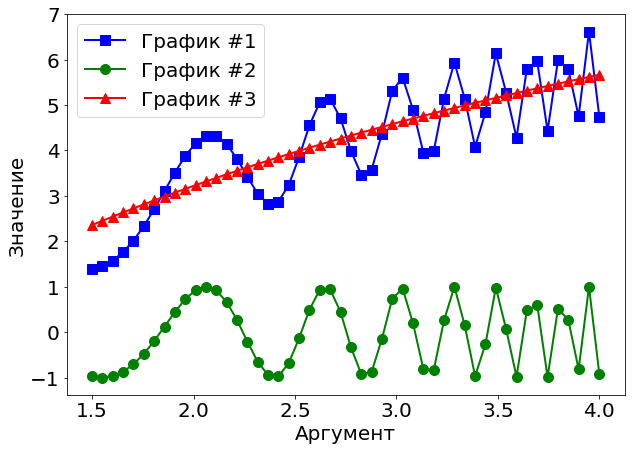

In [5]:
figsize_ = (10, 7) # чтобы не повторяться

yData2 = np.sin(np.exp(xData))
yData3 = 2*np.log(1. + xData**2)

plt.figure(figsize=figsize_)
# синий цвет линии и маркеров (b - blue), форма маркера - квадрат (s - square)
plt.plot(xData, yData, 'b-s', label='График #1', linewidth=2, markersize = 10)
# зеленый цвет линии и маркеров (g-green), форма маркера - окружность (o)
plt.plot(xData, yData2, 'g-o', label='График #2', linewidth=2, markersize = 10)
# красный цвет линии и маркеров (r - red), форма маркера - треугольник с основанием внизу (^)
plt.plot(xData, yData3, 'r-^', label='График #3', linewidth=2, markersize = 10)
plt.grid('off')
plt.legend()
plt.xlabel('Аргумент')
plt.ylabel('Значение')
plt.show()

## Чуть более продвинутые 1D-графики

Также несколько графиков можно отобразить в нескольких "подокнах", используя команду plt.subplot:

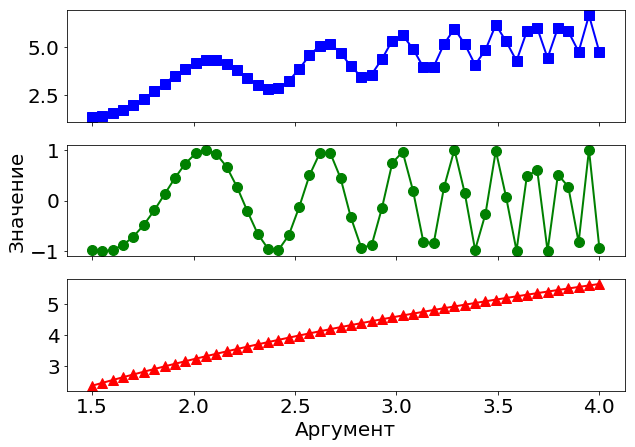

In [6]:
# Создаем 3 подокна в 1 столбце. Вообще, подокна можно располагать как угодно
fig, axes = plt.subplots(3, 1, figsize=figsize_, sharex=True)
# синий цвет линии и маркеров (b - blue), форма маркера - квадрат (s - square)
axes[0].plot(xData, yData, 'b-s', label='График #1', linewidth=2, markersize = 10)
# зеленый цвет линии и маркеров (g-green), форма маркера - окружность (o)
axes[1].plot(xData, yData2, 'g-o', label='График #2', linewidth=2, markersize = 10)
# красный цвет линии и маркеров (r - red), форма маркера - треугольник с основанием внизу (^)
axes[2].plot(xData, yData3, 'r-^', label='График #3', linewidth=2, markersize = 10)


axes[1].set_ylabel('Значение')
axes[2].set_xlabel('Аргумент')

for ax in axes:
    ax.grid('off')

plt.show()

## __2D-графики__

Рассмотрим только 1 пример:

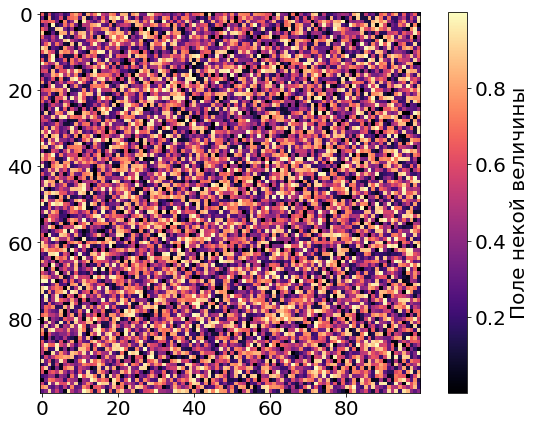

In [8]:
from numpy import random as rdn # импортируем функции вычисления псевдослучайных чисел

xyData = rdn.rand(100,100) # матрица 100x100, заполненная числами от 0 до 1 согласно равномерному распределению

plt.figure(figsize=figsize_)
plt.imshow(xyData, interpolation='none', cmap='magma') # cmap='jet' по-умолчанию
cbar = plt.colorbar()
cbar.set_label('Поле некой величины')
plt.show()

## Другое

Также с помощью средств библиотеки можно строить и другие виды графиков:
* Диаграммы разброса (scatter plot)
* Столбчатые диаграммы (bar chart) и гистограммы (histogram)
* Круговые диаграммы (pie chart)
* Ствол-лист диаграммы (stem plot)
* Контурные графики (contour plot)
* Поля градиентов (quiver)
* Спектральные диаграммы (spectrogram)

_Подробности и примеры можно найти на сайте __matplotlib.org__._

# Объектно-ориентированное программирование
## __Классы и объекты__
__Класс__ = __Поля__ (переменные класса) + __Методы__ (функции класса, работающие с полями). Члены класса обычно делятся на __private__ (к ним имеют доступ только методы класса, обычно это поля) и __public__ (доступны извне класса, обычно это методы). В Python таковое формальное разделение явно отсутствует (в отличие от С++), однако, имеется возможность закрыть доступ извне для переменных - поставить перед именем префикс "-- (двойное нижнее подчеркивание)". Префикс "- (одинарное нижнее подчеркивание)" не запрещает доступ извне, но показывает разработчику, что данное поле/метод класса трогать нельзя.

Классы могут использоваться для моделирования объектов реального мира. Например (как в __Лекции 1__), в программе можно представить данные о каком-либо человеке с помощью класса __Person__. Предположим, что для данного класса в некоем контексте использования можно ограничиться полями __имя, фамилия, возраст, гражданство, прописка__.

In [9]:
class Person:
    def __init__(self): # функция-конструктор
        print('Пустой объект класса ' + self.__class__.__name__ + ' создан.')
    
    # setters
    def SetName(self, name):
        self._name = name # инициализация private-поля _name 
    
    def SetSurname(self, surname):
        self._surname = surname # инициализация private-поля _surname 
    
    def SetAge(self, age): 
        self._age = age  # ... private поля _age
    
    def SetNationality(self, nationality):
        self._nationality = nationality # ... private поля _nationality
    
    def SetAddress(self, address): 
        self._address = address # ... private поля _nationality
        
    
    # getters - для доступа к private-полям извне через методы
    def GetName(self):
        return self._name
    
    def GetSurname(self):
        return self._surname
    
    def GetAge(self):
        return self._age
    
    def GetNationality(self):
        return self._nationality
    
    def GetAdress(self):
        return self._address

__Конструктор__ - функция, вызывающаяся для создания экземпляра класса - __объекта__. Объявление и инициализация переменных происходит внутри методов класса. Во всех методах класса в качестве 1-го аргумента должна явно указываться ссылка на собственный объект (__self__). При вызове методов данный аргумент не указывается (он передается неявно).

Пример использования класса:

In [10]:
person1 = Person()
# примеры работы сеттеров
person1.SetName('John')
person1.SetSurname('Smith')
person1.SetAge(25)
person1.SetNationality('UK')
person1.SetAddress('London, XYZ street, 1')

# примеры работы геттеров
print(person1.GetName(), ';', person1.GetSurname(), ';', person1.GetAge())

Пустой объект класса Person создан.
John ; Smith ; 25


## __Наследование__
__Наследование__ позволяет избежать повторения кода при расширении функциональности программы путем использования ранее написанного кода. 

Рассмотрим данный принцип, создав __дочерний__ класс __Worker__ на основе класса __Person__. Грубо говоря , __Worker__ - это __Person__, но уже с работой. В классе __Worker__ нужно дополнительно сделать поля, скажем, __имя компании, адрес компании, рабочий телефон__. 


Вообще, часть методов в классах-наследниках зачастую приходится реализовывать по-другому (переопределять) - возможность этого обеспечивается свойством __виртуальности__ методов.

In [11]:
class Worker(Person):  # родительский класс указывается в скобках
    
    # конструктор будет точно таким же, как и в родительском классе
    # ---------------------------------------------------------------------------
    # ниже строки кода закомментированы чтобы показать - все методы родительского класса 
    # уже неявно присутствуют в дочернем классе, их не требуется снова определять
    
    ''' 
    def __init__(self): # функция-конструктор
        print('A blanc object of class ' + self.__class__.__name__ + ' is created.')
    
    def SetName(self, name):
        self._name = name # инициализация private-поля _name 
    
    def SetSurname(self, surname):
        self._surname = surname # инициализация private-поля _surname 
    
    def SetAge(self, age): 
        self._age = age  # ... private поля _age
    
    def SetNationality(self, nationality):
        self._nationality = nationality # ... private поля _nationality
    
    def SetAddress(self, address): 
        self._address = address # ... private поля _nationality
    '''
    
    # -------------------------------------------------------------------
    # а вот переопределение метода из родительского класса;
    # виртуальность метода позволяет это провести 
    def SetAge(self, age):
        self._age = age
        if self._age >= 18:
            print ('Я - совершеннолетний рабочий.') # добавим, к примеру, такую фразу
        
    
    # -------------------------------------------------------------------
    # добавляем новые методы
    def SetCompanyName(self, companyName):
        self._companyName = companyName
        
    def SetCompanyAddress(self, companyAddress):
        self._companyAddress = companyAddress
        
    def SetWorkPhone(self, workPhone):
        self._workPhone = workPhone
        
        
    def GetCompanyName(self):
        return self._companyName
    
    def GetCompanyAddress(self):
        return self._companyAddress
    
    def GetWorkPhone(self):
        return self._workPhone

В Python __все методы по-умолчанию являются виртуальными__ (отсутствует надобность добавлять ключевое слово __virtual__ перед именем метода, как того требует С++).

Пример работы с классом:

In [12]:
worker1 = Worker()
worker1.SetName('Marie')
worker1.SetSurname('Smith')
worker1.SetAge(25)
worker1.SetNationality('UK')
worker1.SetAddress('London, XYZ street, 1')

worker1.SetCompanyName('Facebook')
worker1.SetCompanyAddress('London, YXZ street, 1')
worker1.SetWorkPhone('1-111-111-11-11')

Пустой объект класса Worker создан.
Я - совершеннолетний рабочий.


## __Наследование и абстрактные классы__
Пусть перед нами стоит задача реализовать классы для работы с животными (также в определенном контексте): допустим, с __кошкой, собакой, лисой, совой__. В нашем контексте животные могут только __есть__, __спать__ и __издавать определенный звук__.


Пример реализации "в лоб", без использования наследования:

In [13]:
class DemoCat():
    def __init__(self):
        self._isHungry = True  # поля, описывающие состояние животного
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False

    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self):
        print ('Мяу-мяу')

Аналогично создаем классы для остальных 3-х млекопитающих:

In [14]:
class DemoDog():
    def __init__(self):
        self._isHungry = True
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False
        
    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self):
        print ('Гав-гав')
            
class DemoFox():
    def __init__(self):
        self._isHungry = True
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False

    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self):
        print ('Апрфстшмхцтханпрст')
            
class DemoOwl():
    def __init__(self):
        self._isHungry = True
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False

    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self):
        print ('Угу-угу')

Видно, что мы имеем без использования наследования: методы, присущие всем животным, повторяются в соответствующих классах, т.е. впустую потратилось много места. Решим эту проблему с использованием наследования... :

In [15]:
class DemoDog(DemoCat):
    
    def MakeNoise(self): # виртуальная функция, переопределение
        print ('Гав-гав')

Видим, что проблема повторения строчек кода решилась, но появилось одно __НО__: __собака__ стала __кошкой__, которая издает звук 'Woof'. Т.е. из строк кода выше можно заключить, что __собака__ является  __кошкой__ (подвидом кошки), что противоречит ситуации в реальном мире. 


Подобного противоречия можно избежать, если при наследовании задействовать __абстрактный класс__. Создадим абстрактный родительский класс __животное__, в котором будут определены функции --init--(), Eat(), Sleep(), __общие__ для всех четвероногих. Функцию же MakeNoise() оставим __нереализованной__ в абстрактном классе, вместого этого реализуем ее в классах-наследниках. Подобные функции именуются __чисто виртуальными__.
Экземпляры абстрактного класса __не создаются__, т.к. идея абстрактности используются лишь как вспомогательный иструмент.

In [17]:
class AbstractAnimal(): # говорящее название; добавление слова Abstract не делает класс абстрактным!
    def __init__(self):
        self._isHungry = True # __isHungry с 2-мя подчеркиваниями не будет наследоваться
        self._isSleepy = True

    def Eat(self):
        self._isHungry = False

    def Sleep(self):
        self._isSleepy = False

    def MakeNoise(self): # а вот подобное - делает. Чисто виртуальная функция,
        raise NotImplementedError # вызывающая специальное исключение

В языке существует 2 вида ошибок: __синтаксические ошибки__, возникающие при парсинге кода интерпретатором, и __исключения__, всплывающие при попытке исполнения верной синтаксической конструкции (например, операция деления на 0).

Далее в классах-наследниках реализуем (переопределим) соответствующую функцию MakeNoise().

In [18]:
class Cat(AbstractAnimal): 
    def MakeNoise(self):
        print ('Мяу-мяу')
        
class Dog(AbstractAnimal):
    def MakeNoise(self):
        print ('Гав-гав')
        
class Fox(AbstractAnimal):
    def MakeNoise(self):
        print ('Апрфстшмхцтханпрст')
        
class Owl(AbstractAnimal):
    def MakeNoise(self):
        print ('Угу-угу')

Видно, что предыдущее противоречие "собака - это кошка, которая гавкает" отсутсвует: __кошка__, __собака__, __лиса__, __сова__ теперь являются различными видами __животных__, издающих каждый собственный звук. Повторяю, что идея __абстрактности__ используется как вспомогательный инструмент при создании иерархии классов.


Пример использования:

In [19]:
# использование всех классов: вызовы всех методов
cat1 = Cat()
cat1.Eat()
cat1.Sleep()
cat1.MakeNoise()

dog1 = Dog()
dog1.Eat()
dog1.Sleep()
dog1.MakeNoise()

fox1 = Fox()
fox1.Eat()
fox1.Sleep()
fox1.MakeNoise()

owl1 = Owl()
owl1.Eat()
owl1.Sleep()
owl1.MakeNoise()

Мяу-мяу
Гав-гав
Апрфстшмхцтханпрст
Угу-угу


С учетом того, что у всех классов-животных одинаковый набор методов (это набор методов абстрактного родительского класса), ту же самую задачу возможно решить лаконичней:

In [21]:
# вызовы конструкторов происходят при инициализации списка
animals = [Cat(), Dog(), Fox(), Owl()] 

# тестирование работы методов всех классов;
# цикл вместо вызова всех методов последовательно у объектов-животных
for animal in animals:
    animal.Eat()
    animal.Sleep()
    animal.MakeNoise()

Мяу-мяу
Гав-гав
Апрфстшмхцтханпрст
Угу-угу


Также создадим __PetHolder__, класс наследник класса __Person__,  который будет взаимодействовать с животными.

In [25]:
class PetHolder(Person):
        def __init__(self):
                Person.__init__(self) # вызов конструктора род. класса
                self._isHappy = False # пока что в поисках питомца
                
                
        def ObtainAnimal(self, animal): # передаем животное-объект в качестве аргумента
                self._animal = animal

        def FeedAnimal(self):
                self._animal.Eat()
                self._animal.MakeNoise()
                self._isHappy = True
                print ('Я доволен, т.к. мой питомец сыт.')
                

# использование класса
petHolder1 = PetHolder(); 
petHolder1.SetName('Peter')

cat1 = Cat()
petHolder1.ObtainAnimal(cat1)
petHolder1.FeedAnimal()

Пустой объект класса PetHolder создан.
Мяу-мяу
Я доволен, т.к. мой питомец сыт.


Как обычно, в Python не требуется явно указывать тип аргумента-животного в методе ObtainAnimal(): интерпретатор сам распознает тип во время выполнения программы.

__НА ЗАМЕТКУ__: в языке С++ для реализации подобной функциональности потребуется явно указать тип AbstractAnimal (не Cat/Dog/Fox/...) у аргумента animal, чтобы позволить методу ObtainAnimal работать сразу со всеми видами животных (это __полиморфизм__), классы для представления которых были отнаследованы от класса AbstractAnimal. Конкретный тип аргумента (Cat, Dog, Fox или Owl) будет определен во время выполнения программы (это, точнее, __динамический полиморфизм__).

## __Вопросы?__